In [9]:
import uproot
import awkward as ak
import numpy as np
import os
import math
import matplotlib.pyplot as plt

In [10]:
fname='/data_cms_upgrade/cuisset/testbeam18/clue3d/v19/single-file/data/CLUE_clusters.root' 
test = uproot.open(fname)["clusters"]

In [11]:
## Access properties 
# rechits
rhar = test.arrays(["rechits_x","rechits_y","rechits_z","rechits_layer","rechits_energy"])
# 2D clusters
clar = test.arrays(["clus2D_x","clus2D_y","clus2D_z","clus2D_layer","clus2D_energy"])#,"clus2D_idxs"])
# 3D clusters
cl3ar = test.arrays(["clus3D_x","clus3D_y","clus3D_z","clus3D_layer","clus3D_energy"])#,"clus3D_idxs"])

nevt = len(clar["clus2D_x"])
print("tot evts:",nevt)
print("min: ",np.min(clar["clus2D_layer"])," max: ",np.max(clar["clus2D_layer"])," layer# in sample")

tot evts: 11604
min:  1  max:  28  layer# in sample


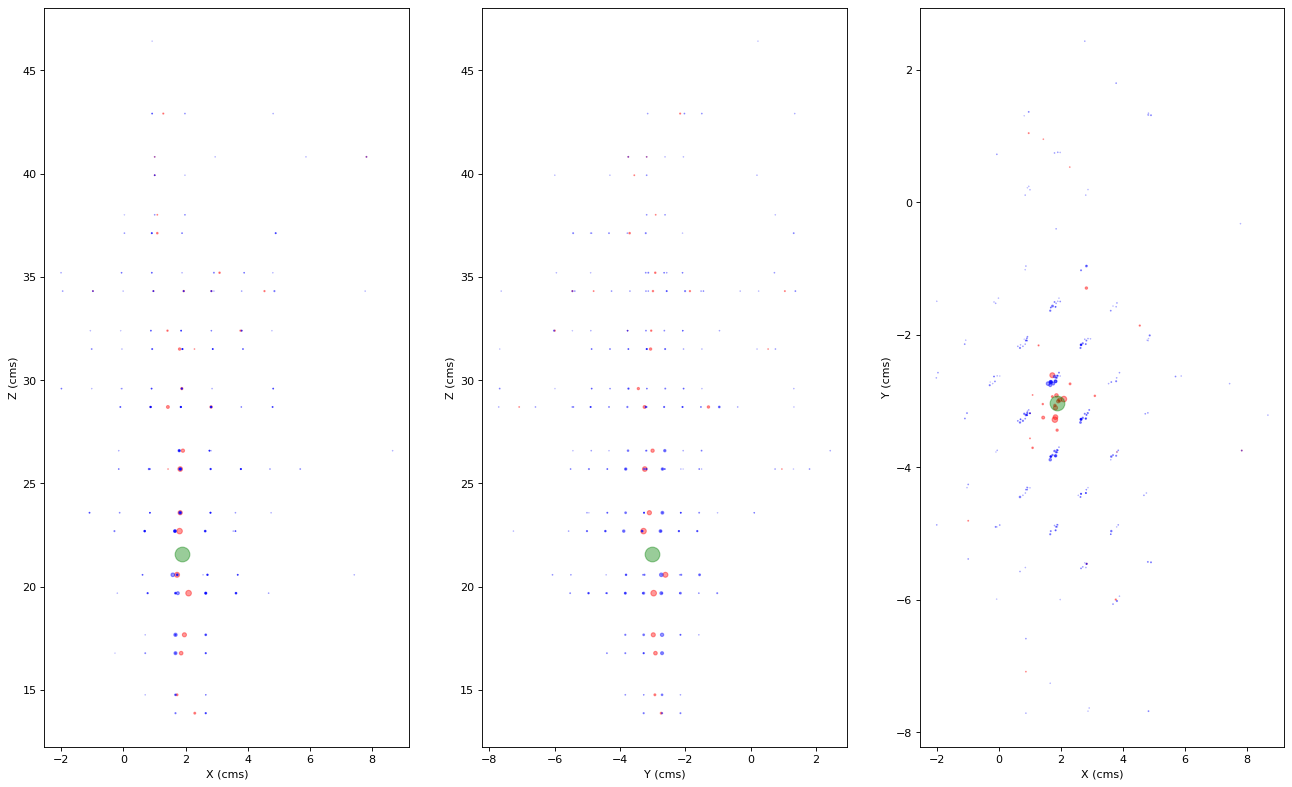

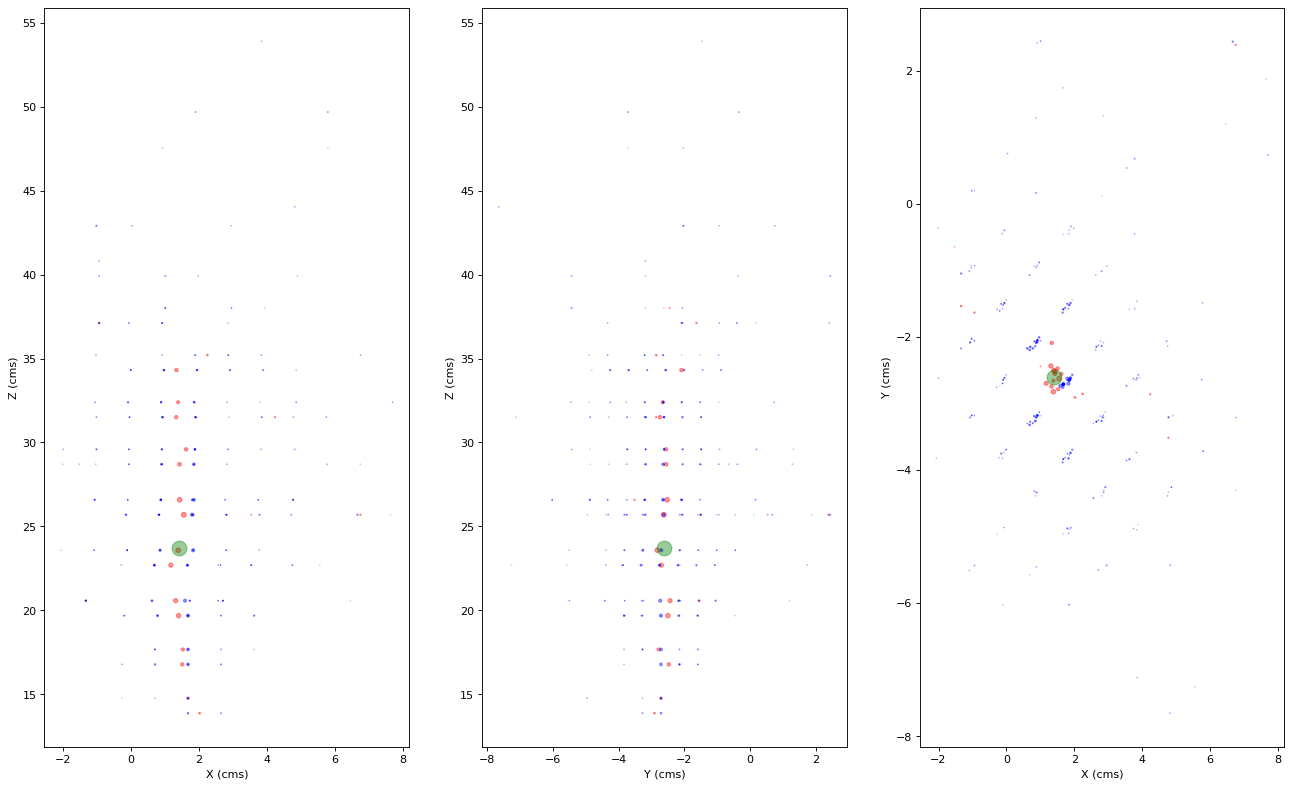

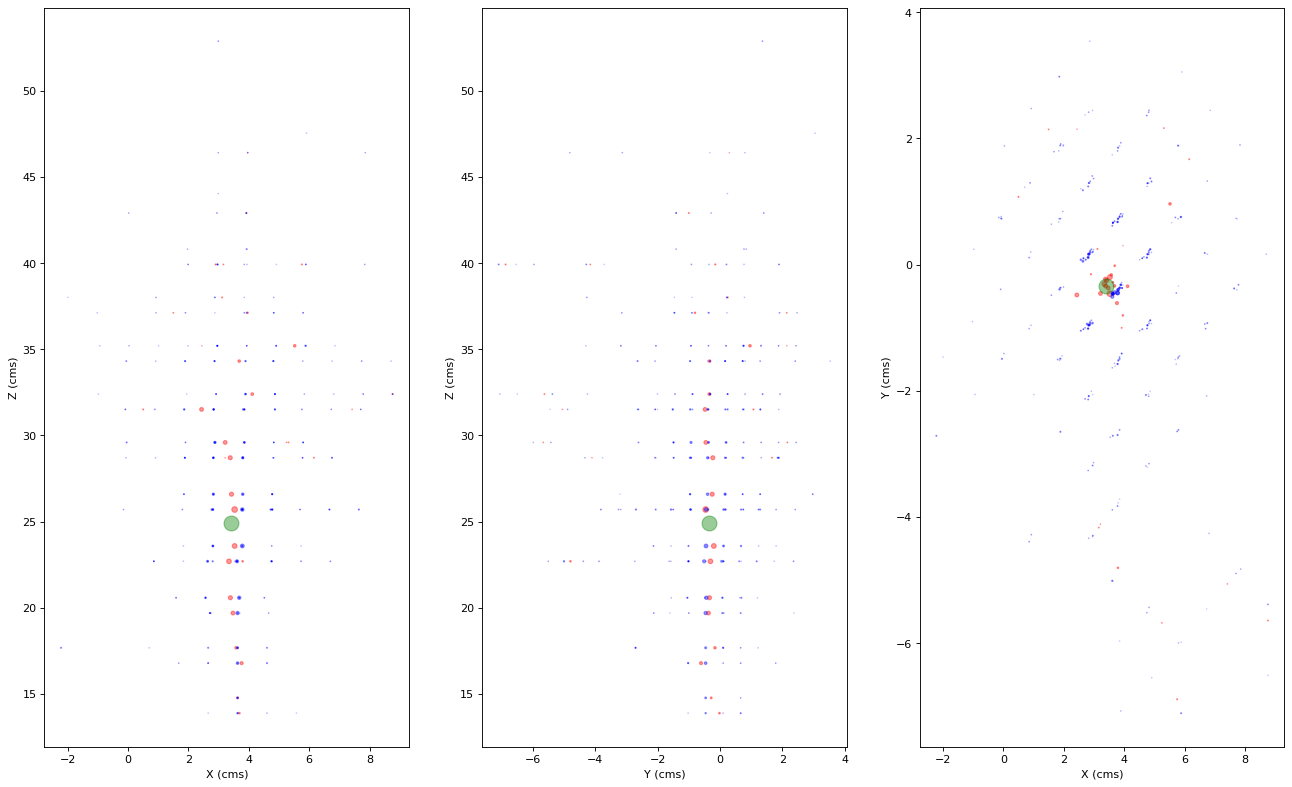

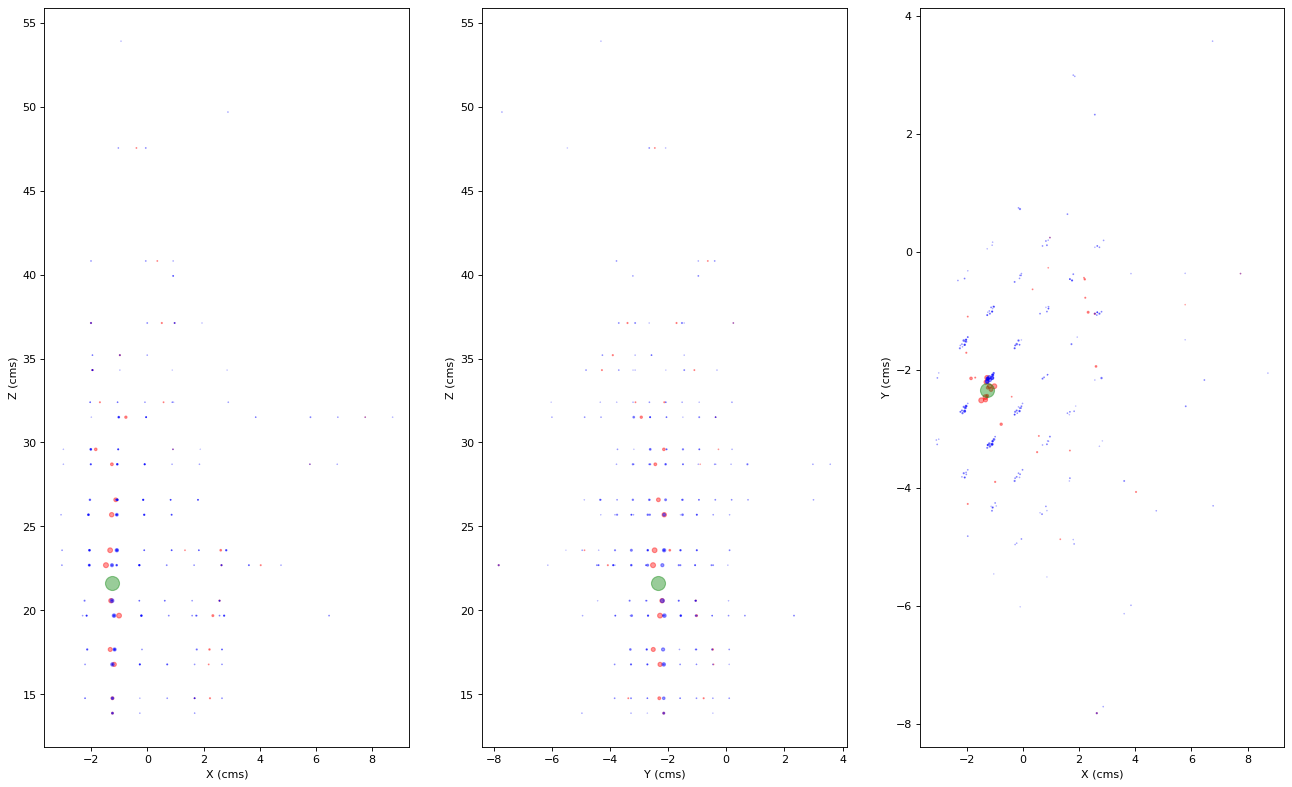

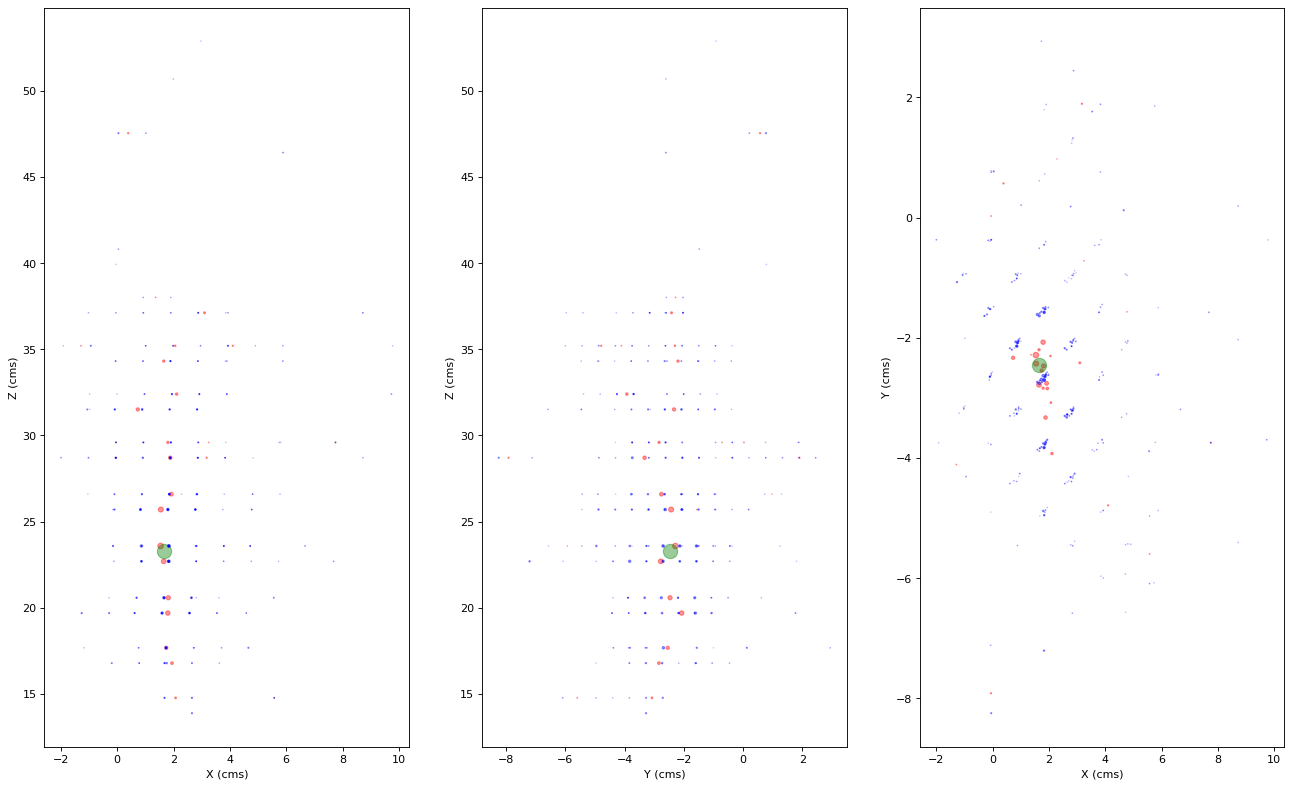

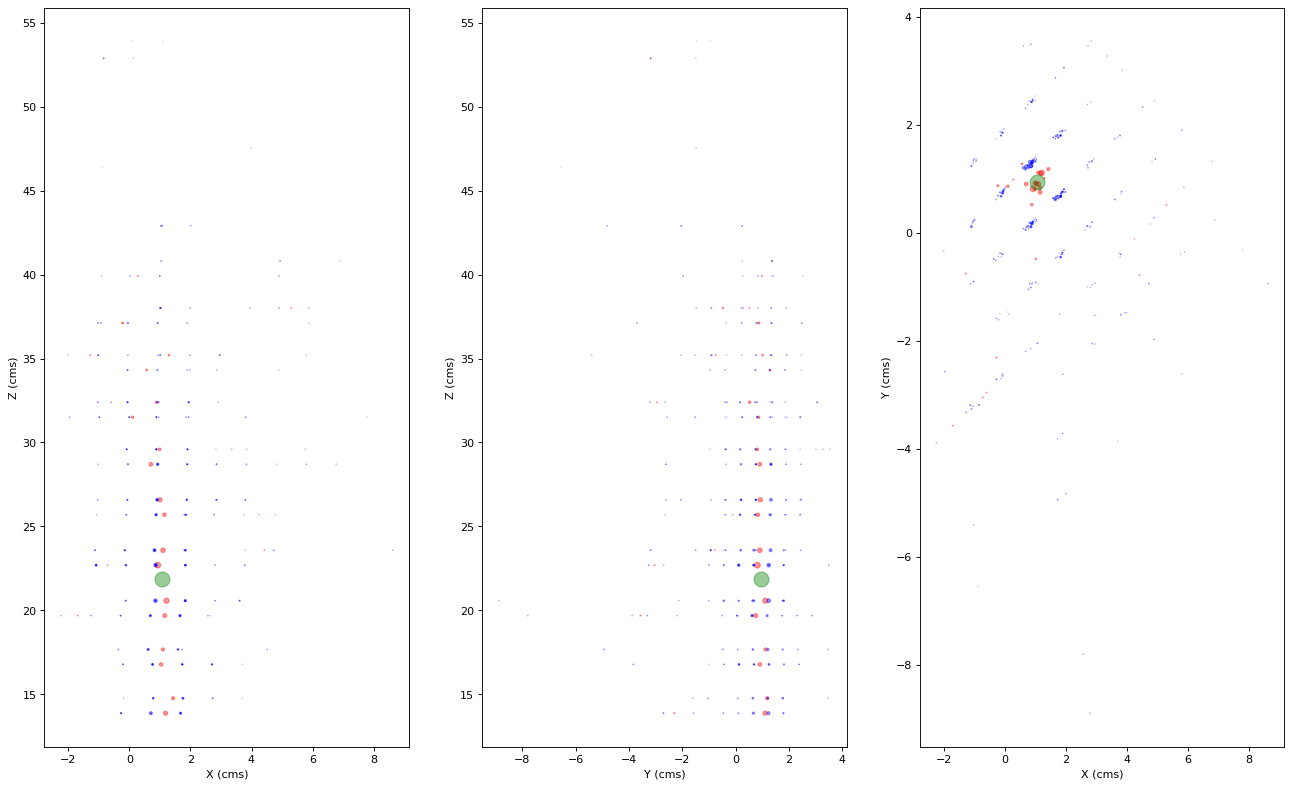

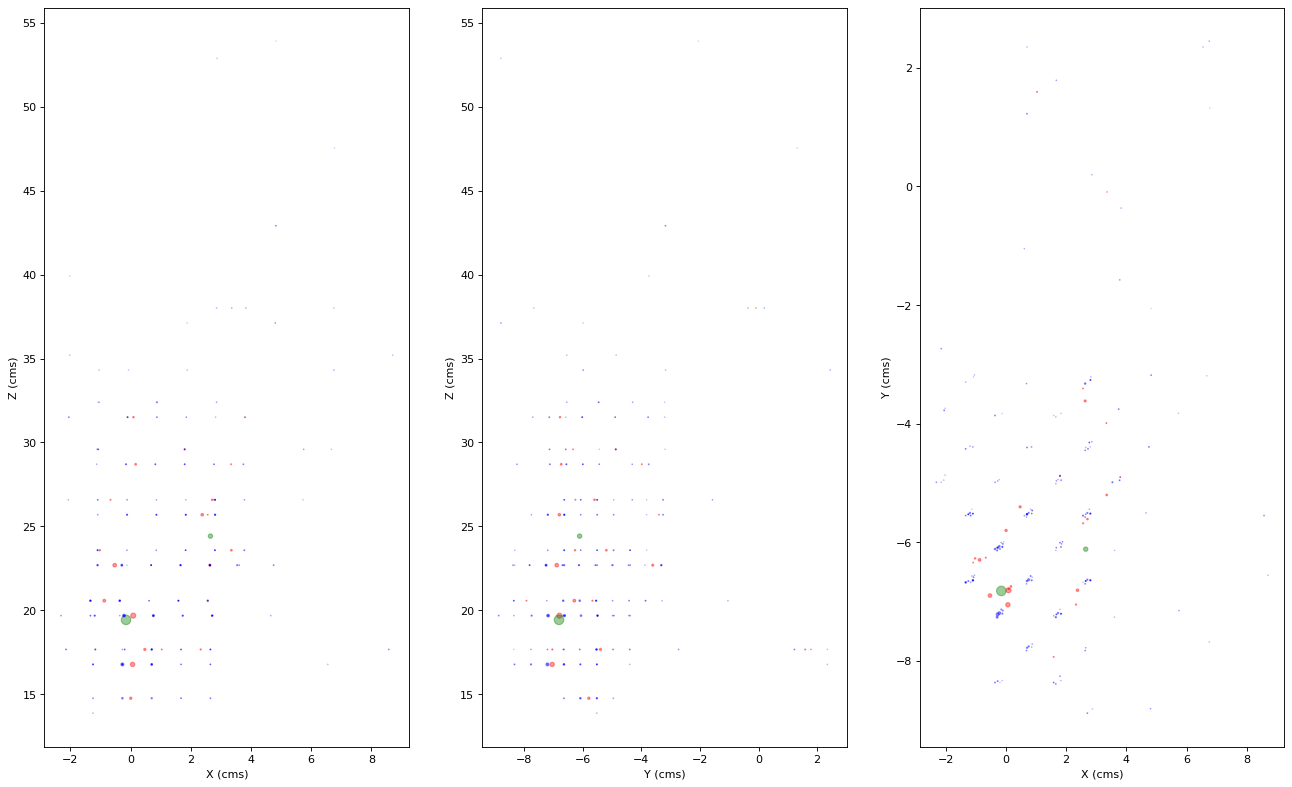

In [12]:
for ev in range(nevt):
    fig, (ax0,ax1,ax2) = plt.subplots(1, 3, figsize=(20,12),dpi=80)    
    ax0.scatter(clar["clus2D_x"][ev],clar["clus2D_z"][ev],s=clar["clus2D_energy"][ev]*10,alpha=0.4,c='r',label="2D cluster")
    ax0.scatter(cl3ar["clus3D_x"][ev],cl3ar["clus3D_z"][ev],s=cl3ar["clus3D_energy"][ev]*10,alpha=0.4,c='g',label="3D cluster")
    #ax0.scatter(cl3ar["clus3D_x"][ev],cl3ar["clus3D_z"][ev],s=50,alpha=0.4,c='g',label="3D cluster")
    ax0.scatter(rhar["rechits_x"][ev],rhar["rechits_z"][ev],s=rhar["rechits_energy"][ev]*10,alpha=0.4,c='b',label="rechit")
    ax0.set_xlabel('X (cms)')
    ax0.set_ylabel('Z (cms)')
    #ax0.legend()
    
    ax1.scatter(clar["clus2D_y"][ev],clar["clus2D_z"][ev],s=clar["clus2D_energy"][ev]*10,alpha=0.4,c='r')
    ax1.scatter(rhar["rechits_y"][ev],rhar["rechits_z"][ev],s=rhar["rechits_energy"][ev]*10,alpha=0.4,c='b')
    ax1.scatter(cl3ar["clus3D_y"][ev],cl3ar["clus3D_z"][ev],s=cl3ar["clus3D_energy"][ev]*10,alpha=0.4,c='g',label="3D cluster")
    ax1.set_xlabel('Y (cms)')
    ax1.set_ylabel('Z (cms)')
    #ax1.legend()
    
    ax2.scatter(clar["clus2D_x"][ev],clar["clus2D_y"][ev],s=clar["clus2D_energy"][ev]*10,alpha=0.4,c='r')
    ax2.scatter(cl3ar["clus3D_x"][ev],cl3ar["clus3D_y"][ev],s=cl3ar["clus3D_energy"][ev]*10,alpha=0.4,c='g',label="3D cluster")
    ax2.scatter(rhar["rechits_x"][ev],rhar["rechits_y"][ev],s=rhar["rechits_energy"][ev]*10,alpha=0.4,c='b')
    ax2.set_xlabel('X (cms)')
    ax2.set_ylabel('Y (cms)')
    #ax2.legend()

    plt.show()
    
    
    if ev > 5:
        break
    